In [1]:
%load_ext nb_black

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

<IPython.core.display.Javascript object>

In [2]:
data_url = (
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv"
)

<IPython.core.display.Javascript object>

In [9]:
df = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [19]:
df["date"] = pd.DatetimeIndex(df["timestamp"]).date

<IPython.core.display.Javascript object>

In [27]:
df.head(5)

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


<IPython.core.display.Javascript object>

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
 5   date          290585 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.3+ MB


<IPython.core.display.Javascript object>

In [29]:
print(df['user_id'].size)
print(df['user_id'].nunique())

290585
290584


<IPython.core.display.Javascript object>

One id is repeated? or does nunique start at 0?

In [22]:
df2 = df.dropna(subset=["group", "converted"])
control = df2[df2["group"] == "control"]
treatment = df2[df2["group"] == "treatment"]
control["group"].value_counts()

control    145274
Name: group, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
control.info()
treatment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145274 entries, 0 to 290583
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       145274 non-null  int64 
 1   timestamp     145274 non-null  object
 2   group         145274 non-null  object
 3   landing_page  145274 non-null  object
 4   converted     145274 non-null  int64 
 5   date          145274 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145311 entries, 2 to 290584
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       145311 non-null  int64 
 1   timestamp     145311 non-null  object
 2   group         145311 non-null  object
 3   landing_page  145311 non-null  object
 4   converted     145311 non-null  int64 
 5   date          145311 non-null  object
dtypes: int64(2), object(4)
memory usage: 

<IPython.core.display.Javascript object>

In [35]:
print("treatment and control rates of conversion:")
print(treatment["converted"].mean())
print(control["converted"].mean())

treatment and control rates of conversion:
0.11880724790277405
0.1203863045004612


<IPython.core.display.Javascript object>

In [23]:
t_obs=treatment['group'].size
c_obs=control['group'].size

print('control size: ' + str(c_obs))
print('treatment size: ' + str(t_obs))


control size: 145274
treatment size: 145311


<IPython.core.display.Javascript object>

These sample sizes seem quite large and will probably be enough for any sort of test

Do a t-test:

In [31]:
stats.ttest_ind(treatment["converted"], control["converted"])

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

<IPython.core.display.Javascript object>

On first glance, not a significant difference

Let's look at the influence of measurement time:

In [36]:
df2["date"].value_counts()

2017-01-08    13387
2017-01-11    13361
2017-01-06    13353
2017-01-10    13350
2017-01-23    13349
2017-01-21    13309
2017-01-22    13265
2017-01-15    13263
2017-01-09    13243
2017-01-07    13213
2017-01-20    13213
2017-01-03    13208
2017-01-12    13159
2017-01-17    13155
2017-01-14    13148
2017-01-16    13136
2017-01-19    13130
2017-01-04    13119
2017-01-18    13085
2017-01-13    13060
2017-01-05    12932
2017-01-24     7435
2017-01-02     5712
Name: date, dtype: int64

<IPython.core.display.Javascript object>

In [54]:
control_day = control.groupby(["date"])[["converted"]].mean()
treatment_day = treatment.groupby(["date"])[["converted"]].mean()


<IPython.core.display.Javascript object>

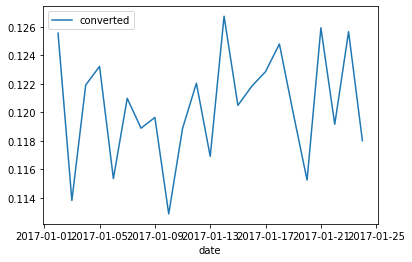

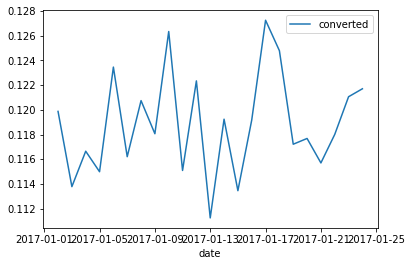

<IPython.core.display.Javascript object>

In [57]:
control_day.plot()
treatment_day.plot()

Combining them in one dataframe/plot:

In [59]:
per_day_group = df2.groupby(["date", "group"])[["converted"]].mean()
per_day_group.head()

converted
date       group               
2017-01-02 control     0.125568
           treatment   0.119874
2017-01-03 control     0.113809
           treatment   0.113781
2017-01-04 control     0.121922

<IPython.core.display.Javascript object>

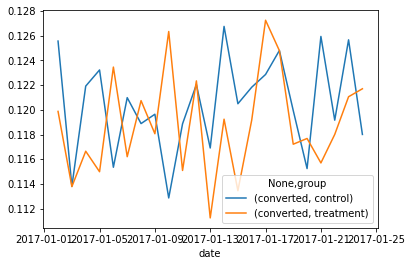

<IPython.core.display.Javascript object>

In [60]:
per_day_group.unstack().plot()

Doesn't look like a significant difference even by day

Even so, check t stats:


In [62]:
for day in df2.date.unique():
    dated_data = df2[df2.date == day]
    print(
        stats.ttest_ind(
            dated_data[dated_data.group == "treatment"].converted,
            dated_data[dated_data.group == "control"].converted,
        )
    )

Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult(statistic=-0.809492283

<IPython.core.display.Javascript object>